 ## The RMS Titanic

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

In [13]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration/Analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



survival:   Survival

PassengerId: Unique Id of a passenger.

pclass: Ticket class    

sex:    Sex 

Age:    Age in years    

sibsp:  # of siblings / spouses aboard the Titanic  

parch:  # of parents / children aboard the Titanic  

ticket: Ticket number   

fare:   Passenger fare  

cabin:  Cabin number    

embarked:   Port of Embarkation

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
a=train_df.isnull().sum().sort_values(ascending=False)
b=train_df.isnull().sum()/train_df.isnull().count()*100
missing_data=pd.concat([a,b],keys=["Total","%"],axis=1)
missing_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,%
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
train_df=train_df.drop(["PassengerId"],axis=1)

In [9]:
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data=[train_df,test_df]
for dataset in data:
    dataset["Cabin"]=dataset["Cabin"].fillna("U0")
    
    dataset["Deck"]=dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
    
    
    
    
    

In [10]:
train_df=train_df.drop(["Cabin"],axis=1)
test_df=test_df.drop(["Cabin"],axis=1)


In [11]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [12]:
test_df["Age"].isnull().sum()

0

In [20]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
test_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [22]:
common_value="S"
data=[train_df,test_df]
for dataset in data :
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)

In [23]:
test_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [24]:
train_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [26]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [30]:
data=[train_df,test_df]
for dataset in data:
    dataset["Fare"]=dataset["Fare"].fillna(0)
    dataset["Fare"]=dataset["Fare"].astype(int)


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null int32
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: int32(3), int64(4), object(4)
memory usage: 66.2+ KB


In [32]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,8


In [33]:
gender={"male":0,"female":1}
data=[train_df,test_df]
for dataset in data:
    dataset['Sex']=dataset["Sex"].map(gender)

In [34]:
train_df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [35]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [36]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
port={"S":0,"C":1,"Q":2}
data=[train_df,test_df]
for dataset in data:
    dataset["Embarked"]=dataset["Embarked"].map(port)

In [38]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8


In [39]:
train_df["Age"].unique()

array([22, 38, 26, 35, 41, 54,  2, 27, 14,  4, 58, 20, 39, 55, 28, 31, 25,
       34, 15,  8, 19, 30, 17, 40, 36, 66, 42, 21, 18,  3, 24,  7, 49, 29,
       65,  5, 11, 45, 32, 16,  0, 33, 23, 46, 59, 71, 37, 47, 70, 12,  9,
       51, 44,  1, 61, 56, 50, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

In [40]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [41]:
train_df["Age"].value_counts()

4    168
6    165
5    146
3    140
2    111
1     93
0     68
Name: Age, dtype: int64

In [42]:
train_df=train_df.drop(["Name"],axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,2,1,0,7,0,8
1,1,1,1,5,1,0,71,1,3
2,1,3,1,3,0,0,7,0,8
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,8


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
Deck        891 non-null int32
dtypes: int32(3), int64(6)
memory usage: 52.3 KB


In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,2,1,0,7,0,8
1,1,1,1,5,1,0,71,1,3
2,1,3,1,3,0,0,7,0,8
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,8


In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",0,2,0,0,7,2,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,5,1,0,7,0,8
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,9,2,8
3,895,3,"Wirz, Mr. Albert",0,5,0,0,8,0,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,5,1,1,12,0,8


# Model building

In [46]:
from sklearn.model_selection import train_test_split
X=train_df.drop(['Survived'],axis=1)
y=train_df["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
random_forest.score(X_train,y_train) *100

94.9438202247191

In [14]:
test_df=test_df.drop(["Name"],axis=1)
test_df=test_df.drop(["PassengerId"],axis=1)


In [50]:
y_pred=random_forest.predict(test_df)
test_df["Survived"]=y_pred
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Survived
0,3,0,2,0,0,7,2,8,0
1,3,1,5,1,0,7,0,8,0
2,2,0,3,0,0,9,2,8,0
3,3,0,5,0,0,8,0,8,0
4,3,1,5,1,1,12,0,8,1



#  Kford Vlidation

In [51]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
score=cross_val_score(rf,X_train,y_train,cv=10,scoring="accuracy")
print(score) # return array
print("mean      :",score.mean())
print("stand dev :",score.std())

[0.81944444 0.81944444 0.83333333 0.77777778 0.81944444 0.83333333
 0.78571429 0.85714286 0.82857143 0.77142857]
mean      : 0.8145634920634921
stand dev : 0.026136940233064527


In [52]:
#Feature selection

In [53]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


In [54]:
importances.head(15)

,importance
feature,
Sex,0.301
Fare,0.226
Age,0.159
Deck,0.080
Pclass,0.076
SibSp,0.067
Embarked,0.046
Parch,0.044


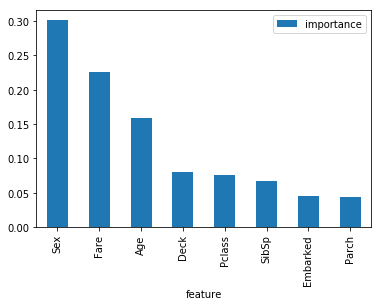

In [55]:
importances.plot.bar()

In [56]:
train_df  = train_df.drop("Embarked", axis=1)
test_df  = test_df.drop("Embarked", axis=1)

In [57]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [58]:
random_forest.score(X_train,y_train)*100

94.9438202247191

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Summary

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [62]:

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

C:\Users\Rohan Gaikwad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
predictions = base_model.predict(X_test)
predictions
base_model.score(predictions,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.         0.2        0.3311111  0.08333334 0.4        0.
 0.03487806 0.3168346  0.         1.         0.6        1.
 1.         0.8        1.         0.85       0.36666667 1.
 0.         0.32666665 1.         0.3845238  0.         1.
 0.4        1.         0.45       0.         0.         0.41973245
 0.3        0.72       0.682381   0.0314547  1.         0.4
 0.         0.8        1.         0.         0.2        0.1
 0.         0.16039683 0.2        0.         0.1352381  0.8
 0.9        1.         0.19777778 0.         0.4        0.
 0.03487806 0.36666667 1.         0.0314547  0.3        1.
 0.         0.         0.         0.6        0.14611112 0.9
 0.8        0.6        0.14       0.         0.0314547  0.1
 0.         0.15       0.6        0.1        1.         0.03487806
 0.325      0.208      0.         0.         0.0314547  0.1
 0.         0.8        0.1        0.6066667  0.7        0.
 0.69       0.4        0.6        0.3        0.05       0.4
 1.         0.16       0.8        0.1        0.3        0.
 0.03487806 1.         0.08511905 0.3        0.5        0.682381
 0.35       0.24166666 1.         0.2        0.         0.3
 0.04       1.         0.6        0.4205303  0.35       0.1
 0.2        0.         0.1        0.03487806 0.84166664 1.
 0.1        1.         0.1        1.         0.682381   0.075
 0.6        0.1        0.48784313 0.         0.5        0.2
 0.15232825 0.         0.1        0.13666667 0.04       0.3845238
 1.         0.         1.         0.         0.5        0.15232825
 0.20634921 0.3        0.         0.         0.1        0.6
 0.26063493 1.         1.         0.6        0.3        0.10185406
 0.10185406 0.9        1.         0.3        0.08511905 0.15232825
 0.9        0.3        0.65       0.1        0.15232825 0.
 1.         0.45       0.3        0.         0.0314547 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.